### 다항회귀

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
df = pd.read_csv('./data/PolynomialRegressionData.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [81]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

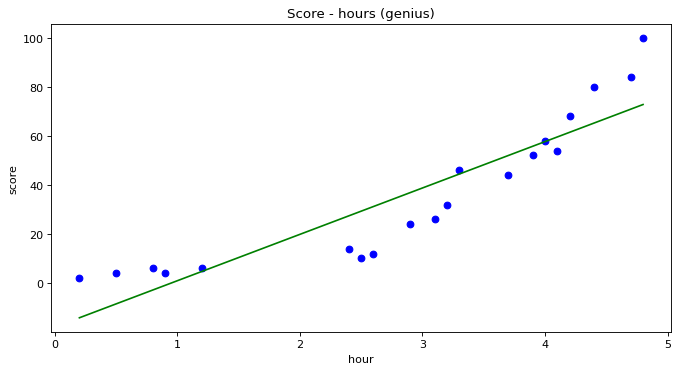

In [82]:
plt.figure(figsize=(10, 5), dpi=80)
plt.scatter(X, y, color='blue')
plt.plot(X, reg.predict(X), color='green')
plt.title('Score - hours (genius)')
plt.xlabel('hour')
plt.ylabel('score')
plt.show()

In [83]:
reg.score(X, y)

0.8169296513411765

In [84]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

In [85]:
X_poly[:5]

array([[1.  , 0.2 , 0.04],
       [1.  , 0.5 , 0.25],
       [1.  , 0.8 , 0.64],
       [1.  , 0.9 , 0.81],
       [1.  , 1.2 , 1.44]])

In [86]:
X[:5]

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])

In [87]:
reg = LinearRegression()
reg.fit(X_poly, y)

LinearRegression()

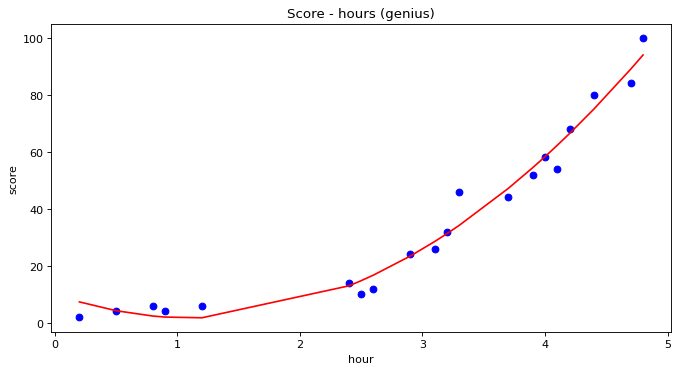

In [88]:
plt.figure(figsize=(10, 5), dpi=80)
plt.scatter(X, y, color='blue')
plt.plot(X, reg.predict(X_poly), color='red')
plt.title('Score - hours (genius)')
plt.xlabel('hour')
plt.ylabel('score')
plt.show()

In [89]:
reg.score(X_poly, y)

0.9755457185555199

In [90]:
import numpy as np

In [91]:
X_range = np.arange(min(X), max(X), 0.1)
X_range

C:\Users\kosmo\AppData\Local\Temp\ipykernel_12080\3009068081.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_range = np.arange(min(X), max(X), 0.1)


array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4,
       1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
       2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ,
       4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7])

In [92]:
X_range = X_range.reshape(-1, 1)
X_range.shape

(46, 1)

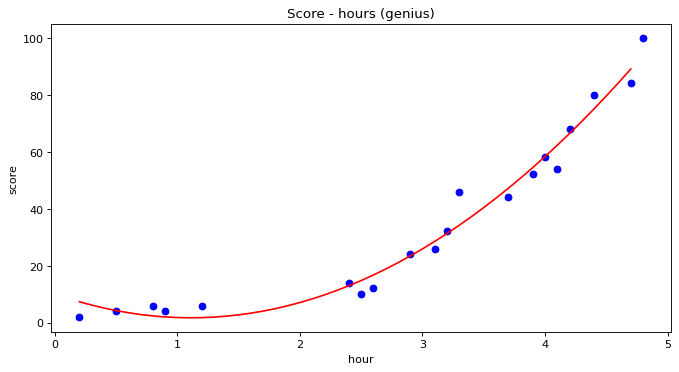

In [93]:
X_poly1 = poly_reg.fit_transform(X_range)

plt.figure(figsize=(10, 5), dpi=80)
plt.scatter(X, y, color='blue')
plt.plot(X_range, reg.predict(X_poly1), color='red')
plt.title('Score - hours (genius)')
plt.xlabel('hour')
plt.ylabel('score')
plt.show()

In [94]:
reg.predict(poly_reg.fit_transform([[2]]))

array([7.05092142])

In [95]:
reg.score(X_poly, y)

0.9755457185555199

### 다시!

In [96]:
### 데이터 읽기
df = pd.read_csv('./data/PolynomialRegressionData.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [97]:
### 독립변수 다항으로 변경
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

In [98]:
### 선형 객체 만들어서 학습시키기
reg = LinearRegression()
reg.fit(X_poly, y)

LinearRegression()

In [100]:
### X 범위를 0.1 단위로 조밀하게 생성 후 이차원배열로 바꿔줌
import numpy as np
X_range = np.arange(min(X), max(X), 0.1)
X_range = X_range.reshape(-1, 1)

C:\Users\kosmo\AppData\Local\Temp\ipykernel_12080\3783184344.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_range = np.arange(min(X), max(X), 0.1)


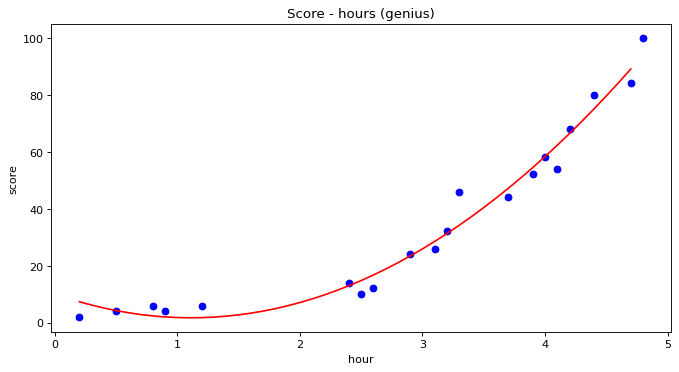

In [101]:
### 그래프 생성
plt.figure(figsize=(10, 5), dpi=80)
plt.scatter(X, y, color='blue')
plt.plot(X_range, reg.predict(poly_reg.fit_transform(X_range)), color='red')
plt.title('Score - hours (genius)')
plt.xlabel('hour')
plt.ylabel('score')
plt.show()

In [103]:
### 4.5시간 공부했을 때 점수예상
pred = reg.predict(poly_reg.fit_transform([[4.5]]))
pred

array([79.56601161])